In [1]:
import pandas as pd
from extract import Count, SocialETL, SocialDB
from rich import print

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import numpy as np
import math

In [4]:
m = SocialDB(100)

In [5]:
m.df

,class
id,
149582,pax
123145,proukr
392910,nocare
708867,proukr
187497,nocare
...,...
206470,nocare
967576,prorus
583034,proukr


In [6]:
m.edges

[{'id': 285657, 'from': 899404, 'to': 565128},
 {'id': 715978, 'from': 862979, 'to': 538556},
 {'id': 105048, 'from': 880174, 'to': 270004},
 {'id': 986485, 'from': 786298, 'to': 619268},
 {'id': 829540, 'from': 862979, 'to': 162930},
 {'id': 262182, 'from': 925458, 'to': 565128},
 {'id': 132515, 'from': 922540, 'to': 765805},
 {'id': 995516, 'from': 127360, 'to': 708867},
 {'id': 967926, 'from': 632744, 'to': 208354},
 {'id': 710470, 'from': 677224, 'to': 284888},
 {'id': 835647, 'from': 899404, 'to': 912399},
 {'id': 624116, 'from': 232993, 'to': 980416},
 {'id': 189272, 'from': 677224, 'to': 922540},
 {'id': 784657, 'from': 312786, 'to': 211474},
 {'id': 328937, 'from': 232993, 'to': 524030},
 {'id': 363722, 'from': 776616, 'to': 925458},
 {'id': 880582, 'from': 289265, 'to': 187497},
 {'id': 520018, 'from': 814534, 'to': 347088},
 {'id': 254144, 'from': 632744, 'to': 119786},
 {'id': 925953, 'from': 645435, 'to': 756918},
 {'id': 957068, 'from': 635853, 'to': 119786},
 {'id': 37674

In [7]:
g= list(m.df.index)
G = nx.Graph()
G.add_nodes_from(g, stand=m.df["class"])
print(G)

In [8]:
edges = [(x["from"], x["to"]) for x in m.edges]
print(edges)

[
    (899404, 565128),
    (862979, 538556),
    (880174, 270004),
    (786298, 619268),
    (862979, 162930),
    (925458, 565128),
    (922540, 765805),
    (127360, 708867),
    (632744, 208354),
    (677224, 284888),
    (899404, 912399),
    (232993, 980416),
    (677224, 922540),
    (312786, 211474),
    (232993, 524030),
    (776616, 925458),
    (289265, 187497),
    (814534, 347088),
    (632744, 119786),
    (645435, 756918),
    (635853, 119786),
    (656085, 671345),
    (369332, 415354),
    (270004, 677224),
    (297521, 966119),
    (653850, 610746),
    (730288, 682106),
    (554816, 160844),
    (428822, 860753),
    (312786, 565128),
    (880174, 619268),
    (243777, 895804),
    (514014, 786298),
    (912399, 347088),
    (687178, 284888),
    (627901, 925458),
    (756918, 682106),
    (610746, 656085),
    (469853, 464772),
    (149582, 980416),
    (514014, 583034),
    (479046, 289265),
    (540482, 187497),
    (706059, 776616),
    (656085, 899404),
    (750186, 776616),
    (786298, 268997),
    (208354, 295336),
    (860753, 907145),
    (232993, 645435),
    (514014, 656085),
    (296540, 123145),
    (302389, 149582),
    (907145, 880174),
    (552199, 238272),
    (123145, 712295),
    (268289, 990092),
    (514014, 295336),
    (786298, 366522),
    (162930, 565128),
    (899404, 706059),
    (601427, 297521),
    (790475, 645435),
    (990092, 428822),
    (369332, 688816),
    (282700, 907145),
    (922540, 967576),
    (862979, 268289),
    (206470, 469853),
    (129187, 392910),
    (599956, 394401),
    (961723, 601427),
    (860753, 392910),
    (756918, 129187),
    (554816, 656085),
    (233007, 565128),
    (583034, 980416),
    (394401, 765805),
    (998066, 415531),
    (297521, 619268),
    (895804, 552199),
    (268289, 297521),
    (160844, 524030),
    (364632, 187497),
    (119786, 338614),
    (998066, 251472),
    (688816, 599956),
    (123145, 862979),
    (268289, 338614),
    (428700, 912399),
    (268289, 688816),
    (656085, 967576),
    (565128, 786298),
    (899404, 251472),
    (895804, 725347),
    (211474, 366522),
    (540482, 776616),
    (860753, 632744),
    (961723, 479046),
    (599956, 980416),
    (627901, 776616),
    (635853, 895804),
    (282580, 601427),
    (119786, 296540),
    (873929, 922540),
    (862979, 187497),
    (129187, 232993),
    (860753, 119786),
    (251472, 415531),
    (538556, 302389),
    (464772, 635853),
    (289265, 601427),
    (282580, 750186),
    (725347, 708867),
    (776616, 725347),
    (632744, 347088),
    (583034, 677224),
    (750186, 238272),
    (449921, 392910),
    (208354, 776616),
    (270004, 296540),
    (251472, 776616),
    (540482, 538556),
    (364632, 123145),
    (296540, 677224),
    (187497, 645435),
    (599956, 873929),
    (392910, 756918),
    (895804, 415354),
    (538556, 498262),
    (790475, 308482),
    (873929, 656085),
    (656085, 347088),
    (756918, 251472),
    (129187, 880174),
    (880174, 860753),
    (284888, 187497),
    (211474, 338614),
    (312786, 538556),
    (708867, 635853),
    (129187, 524030),
    (469853, 107507),
    (392910, 296540),
    (776616, 814534),
    (284888, 238272),
    (366522, 524030),
    (712295, 873929),
    (961723, 922540),
    (232993, 998066),
    (282580, 895804),
    (295336, 750186),
    (540482, 998066),
    (552199, 961723),
    (282700, 208354),
    (706059, 297521),
    (619268, 415531),
    (366522, 873929),
    (814534, 415354),
    (415531, 998066),
    (712295, 243777),
    (966119, 552199),
    (233007, 725347),
    (599956, 776616),
    (708867, 238272),
    (583034, 880174),
    (925458, 394401),
    (925458, 296540),
    (282580, 653850),
    (369332, 251472),
    (232993, 415531),
    (338614, 899404),
    (688816, 428822),
    (129187, 980416),
    (961723, 671345),
    (469853, 980416),
    (880174, 270004),
    (302389, 860753),
    (688816, 469853),
    (415354, 119786),
    (232993, 814534),
    (268289, 162930),
    (786298, 187

In [9]:
G.add_edges_from(edges)

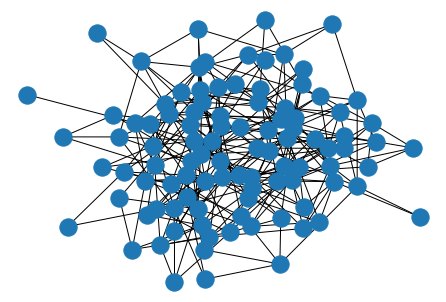

In [10]:
nx.draw(G)

In [14]:
G.degree

DegreeView({149582: 7, 123145: 5, 392910: 6, 708867: 5, 187497: 8, 552199: 6, 394401: 5, 565128: 8, 980416: 7, 688816: 7, 677618: 3, 750186: 9, 870584: 2, 449921: 4, 232993: 9, 899404: 9, 498262: 5, 107507: 5, 415354: 6, 645435: 5, 725347: 7, 297521: 7, 998066: 4, 966119: 3, 524030: 10, 338614: 5, 632744: 8, 129187: 8, 282700: 5, 814534: 7, 895804: 7, 233007: 7, 765805: 3, 540482: 7, 243777: 3, 127360: 4, 268289: 7, 289265: 3, 873929: 7, 296540: 7, 268997: 4, 862979: 5, 284888: 6, 415531: 6, 295336: 6, 922540: 8, 302389: 4, 428822: 7, 469853: 6, 464772: 6, 682106: 5, 635853: 8, 599956: 6, 671345: 5, 160844: 6, 554816: 3, 119786: 7, 961723: 9, 776616: 10, 687178: 1, 211474: 5, 479046: 3, 312786: 4, 538556: 7, 712295: 4, 238272: 6, 251472: 9, 860753: 8, 601427: 6, 656085: 10, 907145: 6, 790475: 7, 990092: 8, 880174: 9, 610746: 6, 925458: 10, 653850: 4, 347088: 7, 270004: 5, 627901: 5, 619268: 5, 369332: 5, 162930: 4, 514014: 6, 208354: 5, 366522: 6, 912399: 5, 308482: 3, 706059: 6, 28960

## Create an Erdons Renyi Random Graph


In [ ]:
er = nx.erdos_renyi_graph(n = 100, p= 0.2, seed = 21)

## Create an Barabasi Albert Graph


In [ ]:
ba = nx.barabasi_albert_graph(n = 100, m = , seed = 21)

# Plot of the networks


In [ ]:
plt.subplot(1, 2, 1)
nx.draw(er, edge_color = "grey", node_color = "indianred")
plt.title('Erdos Ranyi')

plt.subplot(1, 2, 2)
nx.draw(ba, edge_color = "grey", node_color = "steelblue")
plt.title('Barabasi Albert')


plt.show()

### Total degree


In [ ]:
def tot_degree(G):
    tot_deg = 0
    for i in range (0, len(G)):
        for j in range (0, len(G)):
            tot_deg += G.number_of_edges(i, j)
    return tot_deg

print('Total degree of Erdos Ranyi network:', tot_degree(er))
print('Total degree of Barabasi Albert network:', tot_degree(ba))

### Calculate average degree


In [ ]:
def avg_degree(G):
    avg_degree = tot_degree(G)/len(G)
    return avg_degree

print('Average degree of Erdos Ranyi network:', round(avg_degree(er),4))
print('Average degree of Barabasi Albert network:', round(avg_degree(ba),4))

### Degree distribution


In [ ]:

def degrees(G):
    degrees = []
    for i in range(0, len(G)):
        degrees.append(G.degree(i))
    return degrees

### Plotting a histogram


In [ ]:
#Erdos Ranyi
plt.subplot(1, 2, 1)
plt.style.use('ggplot')
plt.hist(degrees(er), bins = 8,
         color = 'indianred',        
         edgecolor = 'firebrick')
plt.title('Erdos Ranyi')

#labels
plt.xlabel('Degree')
plt.ylabel('Nodes')

#Barabasi Albert
plt.subplot(1, 2, 2)
plt.style.use('ggplot')
plt.hist(degrees(ba), bins = 8,
         color = 'lightsteelblue',
         edgecolor = 'steelblue')
plt.title('Barabasi Albert')



plt.show()

### Plotting a density graph


In [ ]:
fig = plt.figure(figsize=(8,5))

#Erdos Ranyi
sns.distplot(degrees(er), hist = False, kde = True,
             color = 'indianred',
           kde_kws = {'shade': True,
                          'linewidth': 1})

plt.axvline(avg_degree(er), 
            color = 'indianred',
           linestyle = 'dashed',
           linewidth = 1)

#Barabasi Albert
sns.distplot(degrees(ba), hist = False, kde = True,
             color = 'steelblue',
           kde_kws = {'shade': True,
                          'linewidth': 1})
plt.axvline(avg_degree(ba), 
            color = 'steelblue',
           linestyle = 'dashed',
           linewidth = 1)

#Titles, labels and legen
plt.xlabel('K')
plt.ylabel('P(K)')
plt.title('Density Plot of the Degree Distribution')
fig.legend(labels=['Erdos Ranyi','Barabasi Albert'])
plt.show()

# Building the Clustering Coefficient



In [ ]:
#Calculating the denominator and appending it into a list:
def max_edges(G):
    medges = []
    for i in range(0, len(G)):
        medges.append(G.degree(i)*(G.degree(i)-1))
    return medges


In [ ]:
# Calculating the nominator and appending it into a list:
def triangles(G):
    list_friends = []
    list_mine = []
    triangles = 0
    triangles_list = []

    for m in range (0, len(G)):
        for i in range(0, len(G)):
            if G.number_of_edges(m, i) > 0 and m!=i:
                list_mine.append(i)
                for j in range(0, len(G)):
                    if G.number_of_edges(i,j) > 0 and i != j:
                        list_friends.append(j)

        # calculate the amount of edges in common among neigh.
        for z in range(0, len(list_mine)):
            for k in range(0, len(list_friends)):
                if list_mine[z]==list_friends[k]:
                    triangles += 1
        triangles_list.append(triangles)
        triangles = 0
        list_friends = []
        list_mine = []
    return triangles_list


In [ ]:
# Putting it all together:
def clust_coef(G):   
    Cu = []
    for i in range(0, len(G)):
        Cu.append(triangles(G)[i]/max_edges(G)[i])
    net_cc = round(sum(Cu)/len(G), 4)
    return net_cc

In [ ]:
print("Clustering coefficient of Erdos Ranyi:", clust_coef(er))
print("Clustering coefficient of Barabasi Albert:", clust_coef(ba))

In [ ]:
#visualization

In [ ]:
circle1 = plt.Circle((0, 0), 2*(clust_coef(er)), color='indianred')
circle2 = plt.Circle((1, 0), 2*(clust_coef(er)*math.sqrt(clust_coef(ba)/clust_coef(er))), color='steelblue')

fig, ax = plt.subplots()

plt.xlim(-1.25,2)
plt.ylim(-1,1.25)

ax.set_aspect(1)
ax.set_facecolor('xkcd:white')
ax.tick_params(labelbottom=False, labelleft =False, bottom = False, left = False)
ax.legend((circle1, circle2), ('Erdos Ranyi: {}'.format(clust_coef(er)), 'Barabasi Albert: {}'.format(clust_coef(ba))))
plt.title('Clustering coefficient of each model')

ax.add_artist(circle1)
ax.add_artist(circle2)
plt.show()

### other metrics

In [ ]:
#Clustering coefficient
cc_er = nx.average_clustering(er)
cc_ba = nx.average_clustering(ba)

In [ ]:
#Average path length: Measures the average distance of the shortest path between every pair of nodes.
apl_er = nx.average_shortest_path_length(er)
apl_ba = nx.average_shortest_path_length(ba)

In [ ]:
#Assortativity: Measures the similarity of connections in the graph with respect to the node degree.
ast_er = nx.degree_assortativity_coefficient(er)
ast_ba = nx.degree_assortativity_coefficient(ba)

In [ ]:
#Density: Measures the ratio between the amount of edges versus the total possible amount of edges.
den_er = nx.density(er)
den_ba = nx.density(ba)

In [ ]:
data = {'Model':  ['Erdos Ranyi', 'Barabasi Albert'],
        'Average Degree': [round(avg_degree(er),4), round(avg_degree(ba),4)],
        'Clustering': [round(cc_er,4), round(cc_ba,4)],
        'Average Path Length': [round(apl_er,4), round(apl_ba,4)],
        'Assortativity': [round(ast_er,4), round(ast_ba,4)],
        'Density': [round(den_er,4), round(den_ba,4)]
        }
df = pd.DataFrame(data)
df

### Calculating and plotting centrality measures


In [ ]:
def plots(centrality):
    fig = plt.figure(figsize=(18,6))
    #Erdos Ranyi
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(er)
    colors = df_er[centrality]
    options = {
        "node_color": colors,
        "node_size": 500,
        "edge_color": 'lightgrey',
        "width": 1,
        "cmap": plt.cm.Reds,
        "with_labels": True,
    }


    nx.draw(er, pos, **options)
    plt.title('Erdos Ranyi {} Centrality'.format(centrality))


    #Barabasi Albert
    plt.subplot(1, 2, 2)
    pos = nx.spring_layout(ba)
    colors = df_ba[centrality]
    options = {
        "node_color": colors,
        "node_size": 500,
        "edge_color": 'lightgrey',
        "width": 1,
        "cmap": plt.cm.Blues,
        "with_labels": True,
    }


    nx.draw(ba, pos, **options)
    plt.title('Barabasi Albert {} Centrality'.format(centrality))

    plt.show()

#### DEGREE CENTRALITY
 

In [ ]:
df_er = pd.DataFrame(degrees(er), columns = ['Degrees'])
df_ba = pd.DataFrame(degrees(ba), columns = ['Degrees'])

In [ ]:
# reorder df, to assign the good color to each node
df_er = df_er.reindex(er.nodes())
df_ba = df_ba.reindex(ba.nodes())

In [ ]:
plots('Degrees')

#### EIGENVECTOR CENTRALITY


In [ ]:
eigenvector_centrality_er = nx.eigenvector_centrality(er)
eigenvector_centrality_ba = nx.eigenvector_centrality(ba)

In [ ]:
# Saving just the eigenvector values in the data frames
eigenvector_centrality_er = [(eigenvector_centrality_er[node]) for node in eigenvector_centrality_er]
eigenvector_centrality_ba = [(eigenvector_centrality_ba[node]) for node in eigenvector_centrality_ba]

In [ ]:
df_er['Eigenvector'] = eigenvector_centrality_er
df_ba['Eigenvector'] = eigenvector_centrality_ba

In [ ]:
plots('Eigenvector')

#### CLOSENESS CENTRALITY


In [ ]:
closeness_er = nx.closeness_centrality(er)
closeness_ba = nx.closeness_centrality(ba)

In [ ]:
# Saving just the closeness values in the data frames
closeness_er = [(closeness_er[node]) for node in closeness_er]
closeness_ba = [(closeness_ba[node]) for node in closeness_ba]

In [ ]:
df_er['Closeness'] = closeness_er
df_ba['Closeness'] = closeness_ba

In [ ]:
plots('Closeness')


#### BETWEENNESS CENTRALITY



In [ ]:
betweenness_er = nx.betweenness_centrality(er)
betweenness_ba = nx.betweenness_centrality(ba)

In [ ]:

# Saving just the betweenness values in the data frames
betweenness_er = [(betweenness_er[node]) for node in betweenness_er]
betweenness_ba = [(betweenness_ba[node]) for node in betweenness_ba]

In [ ]:
df_er['Betweenness'] = betweenness_er
df_ba['Betweenness'] = betweenness_ba

In [ ]:
plots('Betweenness')